In [2]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

In [3]:
model_code = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real mu;
}
model {
    y ~ normal(mu, 1);
}
"""
model = pystan.StanModel(model_code=model_code)

In [4]:
y_gen = np.random.normal(size=100) + 5
data = dict(y=y_gen, N=len(y_gen))

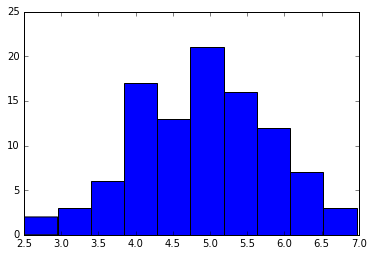

In [18]:
plt.hist(y_gen);

In [19]:
opt = model.optimizing(data=data)
print opt

OrderedDict([(u'mu', array(4.8840176282475))])


In [20]:
fit = model.sampling(data=data)

In [29]:
print fit

Inference for Stan model: anon_model_3aaa1aff3be33470f8a5bfa56085d51c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     4.89  3.4e-3    0.1    4.7   4.82   4.89   4.95   5.08  815.0    1.0
lp__ -41.85    0.02    0.7 -43.81 -41.98 -41.58 -41.42 -41.37  847.0    1.0

Samples were drawn using NUTS(diag_e) at Wed Mar  2 17:09:05 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


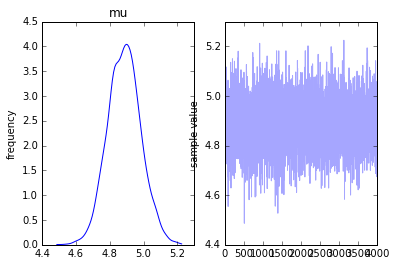

In [22]:
fit.plot();

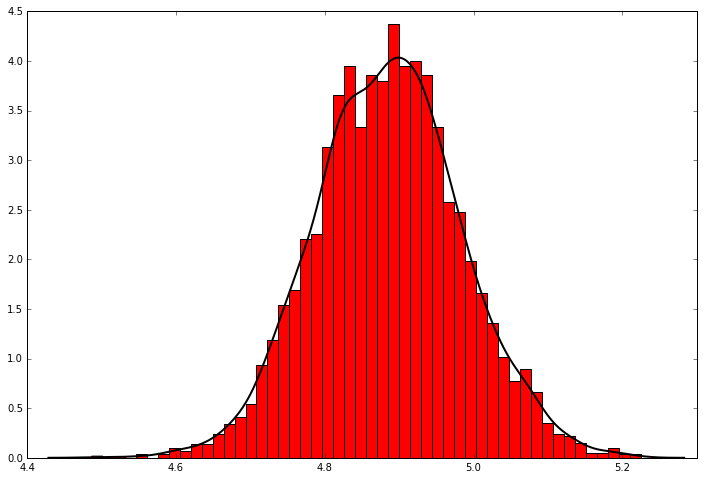

In [28]:
import statsmodels.api as stm

kde = stm.nonparametric.KDEUnivariate(samples['mu'])
kde.fit()

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.hist(samples['mu'], bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black');